In [2]:
def toric_code(n, p):
    rows, cols = (n, n)
    A = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append('I')
        A.append(col)
    #print(A)

    B = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append('I')
        B.append(col)
    #print(B)

    pX = p

    rows, cols = (n, n)
    import random
    #random.seed(1)
    for i in range(rows):
        for j in range(cols):
            ran = random.uniform(0, 1)
            if(ran < pX):
                A[i][j] = 'X'
    #print(A)

    import random
    #random.seed(2)
    for i in range(rows):
        for j in range(cols):
            ran = random.uniform(0, 1)
            if(ran < pX):
                B[i][j] = 'X'
    #print(B)

    sign_matrix = []
    for i in range(rows):
        col = []
        for j in range(cols):
            col.append(1)
        sign_matrix.append(col)
    #print(sign_matrix)

    for i in range(rows):
        for j in range(cols):
            if A[i][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if B[i][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if A[i][(j + 1) % cols] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
            if B[(i + 1) % rows][j] == 'X':
                sign_matrix[i][j] = (-1) * sign_matrix[i][j]
    #print(sign_matrix)

    import networkx as nx
    G = nx.Graph()
    k = 0
    for i in range(rows):
        for j in range(cols):
            if (sign_matrix[i][j] == -1):
                k = k + 1
                G.add_node(k, coordinates = (i, j))
    #print(G)
    #print(G.nodes[1]['coordinates'])
    #print(G.nodes[2]['coordinates'])
    #print(G.nodes[3]['coordinates'])
    #print(G.nodes[4]['coordinates'])

    for x in range(k):
        for y in range(k):
            if x < y:
                l1 = G.nodes[x + 1]['coordinates']
                l2 = G.nodes[y + 1]['coordinates']
                xdist = abs(l1[1] - l2[1])
                ydist = abs(l1[0] - l2[0])
                dist1 = xdist + ydist
                dist2 = abs(n - xdist) + abs(ydist)
                dist3 = abs(xdist) + abs(n - ydist)
                dist4 = abs(n - xdist) + abs(n - ydist)
                final_dist = min(dist1, dist2, dist3, dist4)
                #print(x, y, final_dist)
                if(final_dist == dist1):
                    flag = 1
                elif (final_dist == dist2):
                    flag = 2
                elif (final_dist == dist3):
                    flag = 3
                else:
                    flag = 4
                G.add_edge(x + 1, y + 1, weight = (-1) * final_dist, direction = flag)
    #print(G)

    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality = True, weight = 'weight')
    matching = list(matching)
    #print(matching)
    #print(G.nodes[1])
    #print(G.nodes[2])
    #print(G.nodes[3])
    #print(G.nodes[4])
    #print(G.nodes[5])
    #print(G.nodes[6])
    #print(G.edges[(1, 2)])
    #print(G.edges[(4, 3)])
    #print(G.edges[(6, 5)])

    matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality = True, weight = 'weight') # Minimum weight perfect matching
    matching = list(matching) # Matching converted to list
    CC = []

    for edge in matching:
        nodeM = edge[0] # One node of an edge
        nodeN = edge[1] # Another node of an edge
        coordM = G.nodes[nodeM]['coordinates'] # Coordinates of node M
        coordN = G.nodes[nodeN]['coordinates'] # Coordinates of node N
        #print(coordM)
        #print(coordN)

        if (coordM[1] > coordN[1]): # If node M is to the left of node N
            coordM, coordN = coordN, coordM # Swap nodes M and N

        direction = G.edges[edge]['direction'] # Orientation of edge, depending on which we will find the correction path C
        #print(direction)

        if (direction == 1):
            C = []       
            if(coordM[1] != coordN[1]):
                for i in range(coordM[1] + 1, coordN[1] + 1, 1):
                    C.append(('A', coordM[0], i))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0] + 1, coordN[0] + 1):
                    C.append(('B', j, coordN[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0], coordN[0], -1):
                    C.append(('B', j, coordN[1]))
            C = list(set(C))
            CC = CC + C
            #print(C)

        if (direction == 2):
            C = []
            i = coordN[1]
            if(coordM[1] != coordN[1]):
                for i in range(coordM[1], 0 - 1, -1):
                    C.append(('A', coordM[0], i))
                for i in range(n - 1, coordN[1], -1):
                    C.append(('A', coordM[0], i))
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0] + 1, coordN[0] + 1):
                    C.append(('B', j, coordN[1]))
            if(coordM[0] > coordN[0]):    
                for j in range(coordM[0], coordN[0], -1):
                    C.append(('B', j, coordN[1]))
            C = list(set(C))
            CC = CC + C

        if (direction == 3):
            C = []
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0], 0 - 1, -1):
                    C.append(('B', j, coordM[1]))
                for j in range(n - 1, coordN[0], -1):
                    C.append(('B', j, coordM[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0] + 1, n):
                    C.append(('B', j, coordM[1]))
                for j in range(0, coordN[0] + 1):
                    C.append(('B', j, coordM[1]))
            for i in range(coordM[1] + 1, coordN[1] + 1):
                C.append(('A', coordN[0], i))
            C = list(set(C))
            CC = CC + C

        if (direction == 4):
            C = []
            if(coordM[0] < coordN[0]):
                for j in range(coordM[0], 0 - 1, -1):
                    C.append(('B', j, coordM[1]))
                for j in range(n - 1, coordN[0], -1):
                    C.append(('B', j, coordM[1]))
            if(coordM[0] > coordN[0]):
                for j in range(coordM[0] + 1, n):
                    C.append(('B', j, coordM[1]))
                for j in range(0, coordN[0] + 1):
                    C.append(('B', j, coordM[1]))
            if(coordM[1] != coordN[1]):
                for i in range(coordM[1], 0 - 1, -1):
                    C.append(('A', coordN[0], i))
                for i in range(n - 1, coordN[1], -1):
                    C.append(('A', coordN[0], i))
            C = list(set(C))
            CC = CC + C

    # Intersections of the horizontal Logical Z (at position n-1) with correction vector CC
    CC_X = 0
    for i in CC:
        if (i[0] == 'B' and i[1] == n - 1):
            CC_X = CC_X + 1
    #print(CC_X)
    
    # Intersections of the vertical Logical Z (at position n-1) with correction vector CC
    CC_Y = 0
    for j in CC:
        if (j[0] == 'A' and j[2] == n - 1):
            CC_Y = CC_Y + 1
    #print(CC_Y)

    # Intersections of error matrix A with vertical Logical Z (at position n-1)
    #[['X', 'I', 'I'], ['I', 'I', 'I'], ['I', 'I', 'X']]
    A_Y = 0
    for i in range(0, n):
        if (A[i][n-1] == 'X'): A_Y = A_Y + 1
    #print(A_Y)

    # Intersections of error matrix B with horizontal logical Z (at position n-1)
    #[['I', 'I', 'X'], ['X', 'I', 'I'], ['I', 'I', 'I']]
    B_X = 0
    for j in range(0, n):
        if (B[n-1][j] == 'X'): B_X = B_X + 1
    #print(B_X)

    if((CC_X + B_X) % 2 == 0 and (CC_Y + A_Y) % 2 == 0):
        #print("No logical error!")
        return 1
    else:
        #print("Logical error!")
        return 0

In [3]:
import matplotlib.pyplot as plt
error_rate_array_3 = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 10000):
        n = 3
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array_3 = error_rate_array_3 + [logical_error_rate]
    #print(logical_error_rate)
print(error_rate_array_3)

[0.0029, 0.0101, 0.0216, 0.0392, 0.0635, 0.0893, 0.1149, 0.1501, 0.1888, 0.2283, 0.2657, 0.3014, 0.3425, 0.379, 0.4137, 0.4356, 0.4682, 0.5126, 0.5313, 0.5625, 0.5882, 0.6041, 0.6277, 0.6478, 0.6466, 0.6682, 0.6762, 0.6909, 0.6972, 0.7057, 0.7141, 0.7231, 0.7234, 0.7325, 0.7336, 0.7395, 0.7422, 0.74, 0.7385, 0.7519, 0.7528, 0.7477, 0.7445, 0.7516, 0.7545, 0.7526, 0.7528, 0.7519, 0.75, 0.7448, 0.7468, 0.7487, 0.7471, 0.7497, 0.7557, 0.7331, 0.7493, 0.7505, 0.7462, 0.7542, 0.7522, 0.758, 0.7624, 0.7623, 0.7668, 0.772, 0.7696, 0.7782, 0.7744, 0.7799, 0.786, 0.7966, 0.8059, 0.8135, 0.8135, 0.8216, 0.8295, 0.8387, 0.8491, 0.8553, 0.8616, 0.878, 0.8863, 0.8962, 0.9076, 0.9142, 0.9272, 0.9392, 0.9506, 0.9551, 0.9661, 0.9752, 0.9787, 0.9868, 0.9919, 0.9951, 0.9991, 0.999, 0.9999]


In [4]:
import matplotlib.pyplot as plt
error_rate_array_5 = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 10000):
        n = 5
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array_5 = error_rate_array_5 + [logical_error_rate]
    #print(logical_error_rate)
print(error_rate_array_5)

[0.0002, 0.0018, 0.0061, 0.0166, 0.0319, 0.0567, 0.0867, 0.1302, 0.1781, 0.2373, 0.2952, 0.3374, 0.3953, 0.439, 0.4875, 0.538, 0.57, 0.603, 0.6219, 0.6564, 0.6769, 0.6943, 0.6957, 0.7176, 0.7145, 0.7346, 0.7303, 0.7339, 0.7362, 0.7532, 0.7488, 0.7456, 0.7524, 0.7485, 0.7454, 0.7442, 0.752, 0.7468, 0.7495, 0.7523, 0.7494, 0.755, 0.7494, 0.7445, 0.7521, 0.7479, 0.745, 0.7548, 0.745, 0.747, 0.7487, 0.7552, 0.7525, 0.749, 0.7507, 0.7483, 0.7497, 0.7565, 0.7462, 0.7495, 0.7525, 0.7454, 0.7575, 0.7575, 0.759, 0.7496, 0.7487, 0.7524, 0.7543, 0.7595, 0.7583, 0.766, 0.7602, 0.7709, 0.7725, 0.7804, 0.7801, 0.7897, 0.7982, 0.8099, 0.8276, 0.8401, 0.8466, 0.8522, 0.8804, 0.8935, 0.9078, 0.9279, 0.9404, 0.95, 0.967, 0.9746, 0.9842, 0.9915, 0.9963, 0.9985, 0.9994, 0.9999, 1.0]


In [5]:
import matplotlib.pyplot as plt
error_rate_array_7 = []
for P in range(1, 100, 1):
    count_0 = 0
    count_1 = 0
    for x in range(0, 10000):
        n = 7
        p = P/100
        val = toric_code(n, p)
        if (val == 0):
            count_0 = count_0 + 1
        elif (val == 1):
            count_1 = count_1 + 1
    logical_error_rate = (count_0)/(count_0 + count_1)
    error_rate_array_7 = error_rate_array_7 + [logical_error_rate]
    #print(logical_error_rate)
print(error_rate_array_7)

[0.0, 0.0003, 0.0018, 0.0069, 0.014, 0.0354, 0.0684, 0.1121, 0.1642, 0.2308, 0.3023, 0.3792, 0.4333, 0.4931, 0.5544, 0.6004, 0.6298, 0.6607, 0.6821, 0.6999, 0.7149, 0.7292, 0.741, 0.7408, 0.7463, 0.7486, 0.7465, 0.7425, 0.75, 0.7606, 0.7482, 0.7519, 0.7411, 0.754, 0.7493, 0.7401, 0.7485, 0.7513, 0.7471, 0.7499, 0.7522, 0.7441, 0.751, 0.7502, 0.7502, 0.7465, 0.7421, 0.7548, 0.7482, 0.7498, 0.7436, 0.7576, 0.7431, 0.756, 0.7492, 0.7534, 0.7501, 0.7527, 0.7513, 0.75, 0.7527, 0.7513, 0.7493, 0.751, 0.7483, 0.7551, 0.7484, 0.7513, 0.7489, 0.7466, 0.7523, 0.744, 0.7515, 0.7575, 0.756, 0.7617, 0.7667, 0.7711, 0.7728, 0.7939, 0.7975, 0.8021, 0.8241, 0.8412, 0.8517, 0.8708, 0.9018, 0.9155, 0.9308, 0.9546, 0.968, 0.9769, 0.99, 0.9945, 0.9979, 0.9994, 1.0, 1.0, 1.0]


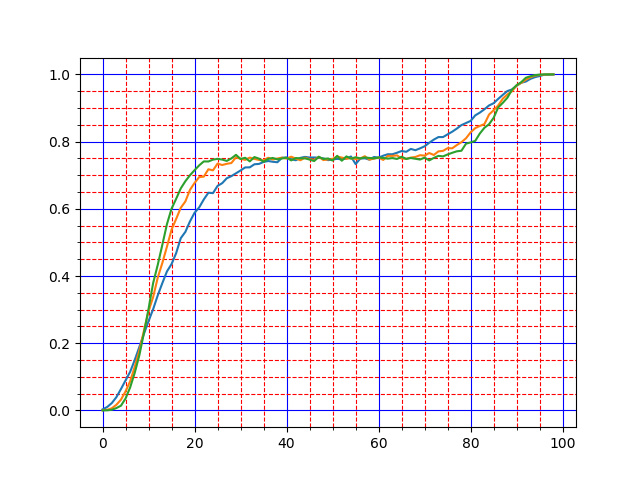

In [6]:
import matplotlib.pyplot as plt
plt.plot(error_rate_array_3)
plt.plot(error_rate_array_5)
plt.plot(error_rate_array_7)
plt.minorticks_on()
plt.grid(axis = 'x')
plt.grid(visible = True, which='major', color='b', linestyle='-')
plt.grid(visible = True, which='minor', color='r', linestyle='--')
plt.show()